# Part 2: Network exploration with NetworkX

##  2.1: Importing network-structured data sets

NetworkX can read variuos formats for representing graphs and network, among them `.gml`, `.GraphML`, `.GEFX`, `.json` and `.yaml`. Additionaly, it can also read simple text files encoding adjacency lists and edge lists.

We've included a dataset representing the social circles of 10 individuals on Facebook. The network is given as an edge list in a simple text format, and saved as `facebook_combined.txt`.

The dataset is part of SNAP - the Stanford Network Analysis Project - which can be found here: https://snap.stanford.edu/index.html .
The dataset we'll be using can be found here: https://snap.stanford.edu/data/egonets-Facebook.html

Let's take a look at five random lines of this file:

In [1]:
FB_FNAME = 'facebook_combined.txt'
with open(FB_FNAME, 'r') as dataset:
    from random import shuffle
    lines = [line for line in dataset]
    shuffle(lines)
    for line in lines[:5]:
        print(line)

1385 1545

1688 1861

3186 3350

2218 2348

1282 1786



As you can see, each line contains two strings seperated by a whitespace, represting a single edge between the two nodes of the given names.

---
 
**Note**: A third argument can be given in each line, representing the weight of the edge. If missing, all edges are assumed of have an equal weight, resulting in an unwighted graph.

The above edge list can be imported into a NetworkX Graph object using the `read_edgelist()` function:

In [2]:
import networkx as nx
g = nx.read_edgelist('facebook_combined.txt')

Some basic stats of a graph object can be examined using the `nx.info()` function.

In [3]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


The next step is to have a look at the network. 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

## 2.2: Visualizing networks

As you can see from the graph's information, it is much larger from the toy graph we used in the previous part. It is thus harder to visualize in a meaningful way.

There are several types of algorithms that draw network in a nice-looking way; among them, force-directed graph drawing is one of the most common approaches. Typically, edges are assigned with spring-like attractive forces, while simultaneously repulsive forces (like those of electrically charged particles) are used to separate all pairs of nodes.

Once the forces on the nodes and edges of a graph have been defined, the behavior of the entire graph under these sources may then be simulated as if it were a physical system. 

*(see more here: https://en.wikipedia.org/wiki/Force-directed_graph_drawing)*.

NetworkX supports the Fruchterman-Reingold force-directed algorithm with the  `spring_layout()` method.

In [15]:
# Position nodes using the Fruchterman-Reingold force-directed algorithm.
spr_layout = nx.spring_layout(g, iterations=40)

**Note:** Calling the `draw()` or `draw_networkx()` functions without giving the a position dictionary will result in these method running the spring layout positionning algorithm on their own. Running it yourself and saving the result to a variable which can be reused will save you a lot of time, as it is often the most expensive operation you'll use.

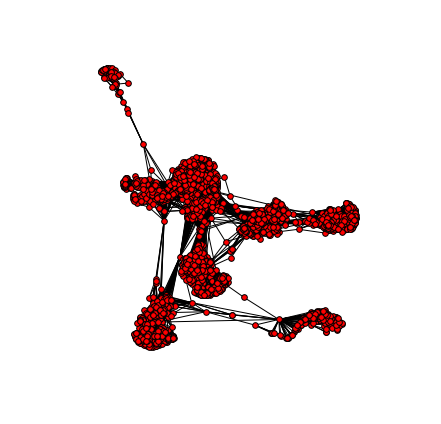

In [22]:
plt.figure(figsize=(7,7)) #sets width and height, respectively, in inches
plt.axis("off") # will display the network without axis
# Draw the graph with Matplotlib with options for node positions, labeling, titles, etc...
nx.draw_networkx(g, pos=spr_layout, with_labels=False, node_size=32)

## 2.3: Node Degree

A basic characteristic of nodes in a network is their degree. This is doubly true in a social network. The NetworkX function `degree()` returns a dict mapping each node to it's degree. Alternatively, you can use `g.degree()` where `g` is your graph object.

In [ ]:
degrees = g.degree() # dictionary node:degree

We can now draw them in a histogram very easily.

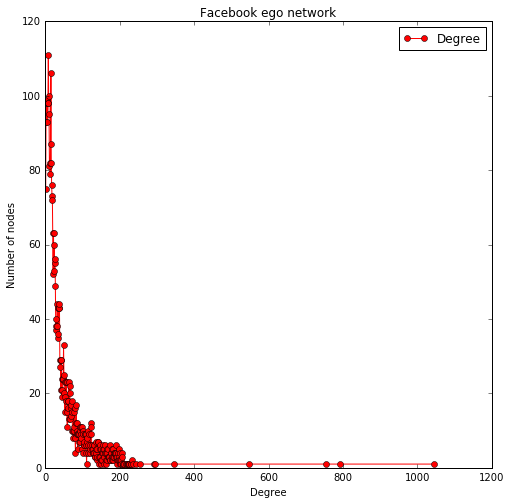

In [52]:
deg_values = sorted(set(degrees.values()))
deg_hist = [list(degrees.values()).count(x) for x in deg_values]
plt.figure(figsize=(8,8))
plt.plot(deg_values, deg_hist, 'ro-') # degree
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook ego network')

The 

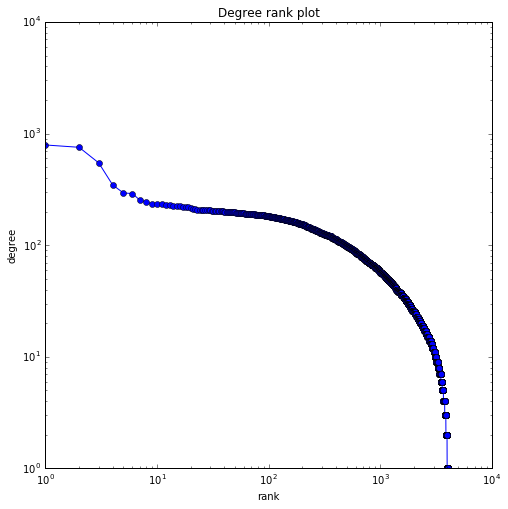

In [55]:
degree_sequence=sorted(nx.degree(g).values(),reverse=True)
plt.figure(figsize=(8,8))
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

## 2.4: Community detection

The community package implement the [Louvain Community Detection Algorithm](https://en.wikipedia.org/wiki/Louvain_Modularity). The repository of this package can be found here: https://bitbucket.org/taynaud/python-louvain

In [11]:
import community

In [24]:
# run the algorithm, dividing the network into communities
# returns a mapping of each node to the community (an integer) it belongs to
node_to_community_map = community.best_partition(g)
# an array - corresponding to the graph's nodes - of the community numbers, will be used to indicate their colos
colors = [node_to_community_map.get(node) for node in g.nodes()]

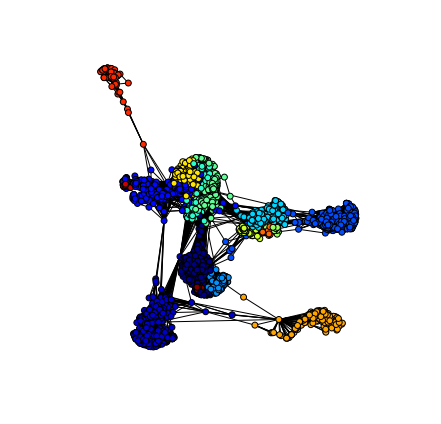

In [25]:
plt.figure(figsize=(7,7))
plt.axis("off")
nx.draw_networkx(g, pos=spr_layout, node_color=colors, node_size=35, with_labels=False)